# GoldSpy Investments
GoldSpy Investments, An up and coming investment fund management took on a small client recently, who wanted to invest a small amount of capital with them. As a beginner to the financial markets he wanted to see if Gold or the S&P500 would be more of a sound investment for the future.

GoldSpy Investments will not present to the client, historical data on both markets, and show which investment is more volatile and lastly what the future may hold for each investment, which the client would then choose to invest in long term.




In [5]:
#import required libraries and dependencies 

import pandas as pd
from pathlib import Path
import os #provides functions for interacting with the operating system
from dotenv import load_dotenv
import requests
import json
import seaborn as sns
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
import hvplot.pandas
%matplotlib inline
from matplotlib import pyplot as plt
sns.set_theme(style="ticks", color_codes=True)



In [6]:
# Load .env enviroment variables into the notebook
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

### Collect and enter LMBA Gold Stock Data

Retrieve and API Key from Nasdaq and store it as a python variable, create a request and response library by using the Nasdaq endpoints.


In [10]:
#retrieve api key from env variable and store as python variable
nasdaq_api_key = os.getenv("nasdaq_api_key")

#define base request url for nasdaq
lmba_gold_url ="https://data.nasdaq.com/api/v3/datasets/LBMA/GOLD?start_date=2022-08-01&end_date=2022-08-24&api_key=Mwi4EGHuLPX4L1CEfouP"


In [11]:
#set the GOLD endpoint
#display response data (super long list)

requests.get(lmba_gold_url).json()


{'dataset': {'id': 11304240,
  'dataset_code': 'GOLD',
  'database_code': 'LBMA',
  'name': 'Gold Price: London Fixing',
  'description': "Gold Price: London Fixings, London Bullion Market Association (LBMA). Fixing levels are set per troy ounce. The London Gold Fixing Companies set the prices for gold that are globally considered as the international standard for pricing of gold. The Gold price in London is set twice a day by five LBMA Market Makers who comprise the London Gold Market Fixing Limited (LGMFL). The process starts with the announcement from the Chairman of the LGMFL to the other members of the LBMA Market Makers, then relayed to the dealing rooms where customers can express their interest as buyers or sellers and also the quantity they wish to trade. The gold fixing price is then set by collating bids and offers until the supply and demand are matched. At this point the price is announced as the 'Fixed' price for gold and all business is conducted on the basis of that pri

### Use pandas
create `read_csv` function and `Path` module to import data from `LMBAGOLD.csv` file and create a dataframe and post 10 most recent prices. del Columns 

In [12]:
## Using the read_csv function and Path module, create a DataFrame 
# import information from "LBMAGOLD.csv"
lmba_gold_csv = Path("../Resources/LBMAGOLD.csv")

lmba_gold_df = pd.read_csv(
    lmba_gold_csv,
    # index_col='Date',
    # infer_datetime_format=True,
    # parse_dates=True,
)

columns = ['Date',
   'Open',
   'Close',
   'GBP (Open)',
   'GBP (Close)',
   'EURO (Open)',
   'EURO (Close)']
lmba_gold_df.columns = columns

del lmba_gold_df['Open']
del lmba_gold_df['GBP (Open)']
del lmba_gold_df['GBP (Close)']
del lmba_gold_df['EURO (Open)']
del lmba_gold_df['EURO (Close)']

lmba_gold_df
#review the first 10 and last 10 rows.
lmba_gold_df.head(10)
lmba_gold_df.tail(10)



,Date,Close
13799,1968-01-15,NaN
13800,1968-01-12,NaN
13801,1968-01-11,NaN
13802,1968-01-10,NaN
13803,1968-01-09,NaN
13804,1968-01-08,NaN
13805,1968-01-05,NaN
13806,1968-01-04,NaN
13807,1968-01-03,NaN
13808,1968-01-02,NaN


In [13]:
lmba_gold_df.sort_values(by='Date', ascending=True, inplace=True)

lmba_gold_split_2018 = lmba_gold_df.loc[
    (lmba_gold_df['Date'] >= "2015-12-01")
    & (lmba_gold_df['Date'] <= "2022-08-22")
]
# lmba_gold_df.sort_values(by='Date', ascending=True, inplace=True)
# lmba_gold_df.set_index('Date', inplace=True)
lmba_gold_split_2018.set_index('Date', inplace=True)

print(lmba_gold_split_2018.shape)

display(lmba_gold_split_2018.head(10))
display(lmba_gold_split_2018.tail(10))


(1698, 1)


,Close
Date,
2015-12-01,1065.40
2015-12-02,1055.40
2015-12-03,1055.45
2015-12-04,1079.25
2015-12-07,1075.80
2015-12-08,1072.10
2015-12-09,1081.00
2015-12-10,1071.00
2015-12-11,1072.50


,Close
Date,
2022-08-08,1784.05
2022-08-09,1795.25
2022-08-10,1795.05
2022-08-11,1796.70
2022-08-12,1792.10
2022-08-15,1776.60
2022-08-16,1774.85
2022-08-17,1767.20
2022-08-18,1765.55


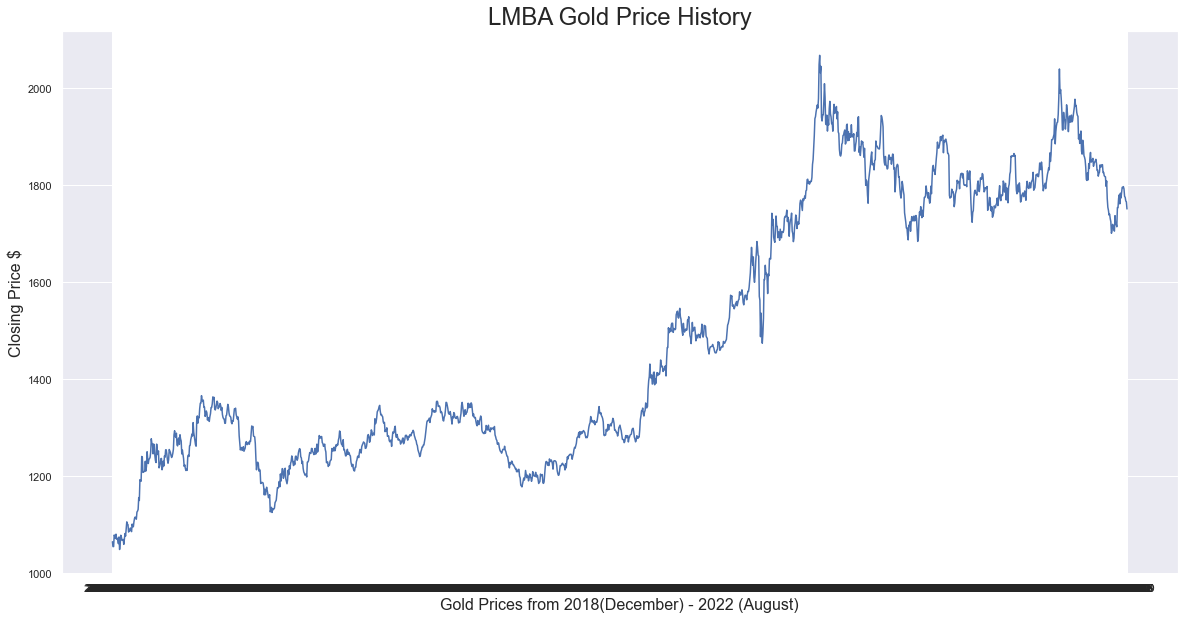

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Gold Prices from 2018(December) - 2022 (August)", size = 16)
plt.ylabel("Closing Price $", size = 16)
plt.title("LMBA Gold Price History", size = 24)
lmba_sense = sns.lineplot(x = "Date", y ="Close", data = lmba_gold_split_2018, ci=False, markers=True
)
